In [1]:
import time

## Sysinfo

In [2]:
from quple.utils import sysinfo

In [2]:
sysinfo.get_cpu_count()

12

In [3]:
sysinfo.get_gpu_count()

0

In [3]:
sysinfo.get_system_memory()

62.6779899597168

## Linear Algebra

In [2]:
import numpy as np
from quple.utils.mathext import abs2, split_gramian_matrix, gramian_matrix

In [38]:
n_event = 10000
n_qubit = 10
A = np.complex128(np.random.rand(n_event, 2**n_qubit) + 1j*np.random.rand(n_event, 2**n_qubit))
B = np.complex128(np.random.rand(n_event, 2**n_qubit) + 1j*np.random.rand(n_event, 2**n_qubit))

In [33]:
A @ B.conjugate().T

array([[1.73616853+0.502026j  , 1.20437816-0.19688715j],
       [1.45982409+0.70053072j, 1.07379988-0.10781175j]])

In [34]:
A.conjugate() @ B.T

array([[1.73616853-0.502026j  , 1.20437816+0.19688715j],
       [1.45982409-0.70053072j, 1.07379988+0.10781175j]])

In [19]:
C = abs2(A.conjugate() @ B.T)

In [42]:
D = abs2(A @ B.conjugate().T)

In [43]:
E = abs2((B @ A.conjugate().T)).T

In [44]:
D-E

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -1.74622983e-10,  1.74622983e-10],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00, -2.32830644e-10],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -1.16415322e-10,  3.49245965e-10],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00, -1.16415322e-10, -1.16415322e-10],
       [ 5.82076609e-11,  1.16415322e-10, -1.16415322e-10, ...,
        -8.73114914e-11,  0.00000000e+00,  0.00000000e+00],
       [ 1.74622983e-10,  5.82076609e-11,  1.16415322e-10, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [17]:
np.vdot(np.vdot(A[0],B[0]),np.vdot(A[0],B[0])).real

261474.25894331667

In [23]:
D

array([[261474.25894332, 265237.6701346 , 255192.97609822, ...,
        252759.63293007, 254022.25656311, 261480.56569932],
       [274467.83828542, 268099.83774944, 259170.94392384, ...,
        249744.33087399, 256352.25248452, 256067.44912942],
       [270018.95429385, 263942.00863949, 255662.0058756 , ...,
        247993.96769196, 256263.56065899, 257451.1276877 ],
       ...,
       [275942.02682634, 278162.90470732, 263845.59447631, ...,
        250828.11450666, 262730.38606925, 262092.39111965],
       [260046.20822493, 269340.6838083 , 246921.94654086, ...,
        239927.85213643, 244985.27509214, 249556.26838882],
       [253241.69909187, 256700.81557339, 241172.45997724, ...,
        237255.29264645, 243568.81303399, 243398.16886881]])

In [5]:
start = time.time()
B = gramian_matrix(A, A)
end = time.time()
print(end-start)

8.454598426818848


In [13]:
start = time.time()
C = split_gramian_matrix(A, A, 20)
end = time.time()
print(end-start)

23.721909761428833


In [14]:
np.sum(C-B)

(-2.0872903405688703e-10+6.9230314432169435e-12j)

In [65]:
start = time.time()
C = np.zeros((n_event, n_event), dtype=np.float64)
C[:5000, :5000] = foo1(A[:5000], A[:5000])
C[:5000, 5000:] = foo1(A[:5000], A[5000:])
C[5000:, :5000] = foo1(A[5000:], A[:5000])
C[5000:, 5000:] = foo1(A[5000:], A[5000:])
end = time.time()
print(end-start)

9.388617992401123


In [116]:
B

array([[470177.0673174 , 262605.02247132, 262982.49287237, ...,
        264808.69307487, 268778.36240316, 274050.45608064],
       [262605.02247132, 465902.98328999, 263699.63570596, ...,
        263075.35115233, 263327.32404276, 262728.35221375],
       [262982.49287237, 263699.63570596, 466256.491901  , ...,
        259451.75003039, 267528.94031165, 266838.29910547],
       ...,
       [264808.69307487, 263075.35115233, 259451.75003039, ...,
        456033.64336617, 273888.92733905, 264153.33774485],
       [268778.36240316, 263327.32404276, 267528.94031165, ...,
        273888.92733905, 476020.79343496, 278846.41609876],
       [274050.45608064, 262728.35221375, 266838.29910547, ...,
        264153.33774485, 278846.41609876, 476213.03393253]])

In [78]:
C[0][0] == abs2(np.dot(A[0],A[0].conjugate()))

True

In [82]:
np.where(C!=B)[0][0]

210

In [83]:
np.where(C!=B)[1][0]

1

In [88]:
B[210][1] == abs2(np.dot(A[210],A.conjugate()[1]))

False

In [85]:
C[np.where(C!=B)]

array([261373.4504781 , 271266.31178452, 259797.23936805, ...,
       269320.49128068, 264153.33774485, 476213.03393253])

261373.45047809675

In [90]:
B[210][1]

261373.45047809658

In [93]:
abs2(np.dot(A[210],A.conjugate()[1])).dtype

dtype('float64')

In [94]:
C[210][1].dtype

dtype('float64')

In [96]:
1000 // 4

250

In [119]:
4%3

1

In [25]:
import numpy as np
from qiskit import *
circ = QuantumCircuit(3)
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)
from qiskit import Aer

# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')
result = execute([circ for c in range(10000)], backend).result()

In [21]:
del result.results[0].data.statevector

In [27]:
del result.results[0].data

In [29]:
result.results[1].data

ExperimentResultData(statevector=[0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j])

In [30]:
test = []

In [31]:
test.append(result.results[1].data.statevector.copy())

In [32]:
del result.results[1].data.statevector

In [33]:
test

[array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])]

In [34]:
result.results[1].data

ExperimentResultData()

In [36]:
30000*30000*8/1024**3

6.705522537231445

In [37]:
def a(b):
    b[0] = 1

In [39]:
b = np.zeros((1))

In [41]:
a(b)

In [42]:
b

array([1.])

In [85]:
import qiskit
from abc import ABC

class QiskitCircuit(ABC):
    def __init__(self, n_qubit):
        self._circuit = qiskit.QuantumCircuit(n_qubit)
    def append(self, gate_ops, qubits):
        self._circuit.append(gate_ops, qubits)
    def __repr__(self):
        return self._circuit.__repr__()
    def __str__(self):
        return self._circuit.__str__()
    
__GATE_MAPPING__ = {
    "H": lambda: qiskit.circuit.library.standard_gates.HGate(), # Hadamard gate
    "I": lambda: qiskit.circuit.library.standard_gates.IGate(),  # one-qubit Identity gate
    "S": lambda: qiskit.circuit.library.standard_gates.SGate(), # Clifford S gate
    "T": lambda: qiskit.circuit.library.standard_gates.TGate(), # non-Clifford T gate
    'X': lambda: qiskit.circuit.library.standard_gates.XGate(), # Pauli-X gate
    "Y": lambda: qiskit.circuit.library.standard_gates.YGate(), # Pauli-Y gate
    "Z": lambda: qiskit.circuit.library.standard_gates.ZGate(), # Pauli-Z gate
    "PauliX": lambda: qiskit.circuit.library.standard_gates.XGate(), # Pauli-X gate
    "PauliY": lambda: qiskit.circuit.library.standard_gates.YGate(), # Pauli-Y gate
    "PauliZ": lambda: qiskit.circuit.library.standard_gates.ZGate(), # Pauli-Z gate
    "Phase": lambda theta: qiskit.circuit.library.standard_gates.PhaseGate(theta), # Phase gate
    "CX": lambda: qiskit.circuit.library.standard_gates.CXGate(), # Controlled-NOT gate
    "CY": lambda: qiskit.circuit.library.standard_gates.CYGate(), # Controlled-Y gate
    "CNOT": lambda: qiskit.circuit.library.standard_gates.CXGate(), # Controlled-NOT gate
    "CZ": lambda: qiskit.circuit.library.standard_gates.CZGate(), # Controlled-Z gate
    "XX": None, # tensor product of two X gates (X parity gate)
    "YY": None, # tensor product of two Y gates (Y parity gate)
    "ZZ": None, # tensor product of two Z gates (Z parity gate)
    "XPowGate": None, # rotation along X axis with extra phase factor
    "YPowGate": None, # rotation along Y axis with extra phase factor 
    "ZPowGate": None, # rotation along Z axis with extra phase factor
    "XXPowGate": None, # X parity gate raised to some power
    "YYPowGate": None, # Y parity gate raised to some power
    "ZZPowGate": None, # Z parity gate raised to some power
    "MS": lambda: qiskit.circuit.library.standard_gates.MSGate(), # Mølmer–Sørensen gate == RXX (A rotation around the XX axis in the two-qubit bloch sphere)
    "RXX": lambda theta: qiskit.circuit.library.standard_gates.RXXGate(theta), # XX Ising coupling gate (A rotation around the XX axis in the two-qubit bloch sphere)
    "RXX": lambda theta: qiskit.circuit.library.standard_gates.RYYGate(theta), # YY Ising coupling gate (A rotation around the YY axis in the two-qubit bloch sphere)
    "RXX": lambda theta: qiskit.circuit.library.standard_gates.RZZGate(theta), # ZZ Ising coupling gate (A rotation around the ZZ axis in the two-qubit bloch sphere)                        
    "RX": lambda theta: qiskit.circuit.library.standard_gates.RXGate(theta), # rotation along X axis
    "RY": lambda theta: qiskit.circuit.library.standard_gates.RYGate(theta), # rotation along Y axis
    "RZ": lambda theta: qiskit.circuit.library.standard_gates.RZGate(theta), # rotation along Z axis
    "CCNOT": lambda: qiskit.circuit.library.standard_gates.CCXGate(), # Toffoli gate
    "CCX": lambda: qiskit.circuit.library.standard_gates.CCXGate(), # Toffoli gate
    "Toffoli": lambda: qiskit.circuit.library.standard_gates.CCXGate(), # Toffoli gate
    "SWAP": lambda: qiskit.circuit.library.standard_gates.SwapGate(), # SWAP gate
    "CSWAP": lambda: qiskit.circuit.library.standard_gates.CSwapGate(), # Controlled SWAP gate
    "ISWAP": lambda: qiskit.circuit.library.standard_gates.iSwapGate(), # ISWAP gate
    "RISWAP": None, #Rotation ISWAP gate (X⊗X + Y⊗Y)
    "FSim": None, # Fermionic simulation gate
    "Fredkin": None, # Controlled SWAP gate
    "CXPowGate": None, # Controlled Power of an X gate
    "CZPowGate": None, # Controlled Power of an Z gate
    "CNOTPowGate": None, # Controlled Power of an X gate
    "U1": lambda: qiskit.circuit.library.standard_gates.U1Gate(),
    "U2": lambda: qiskit.circuit.library.standard_gates.U2Gate(),
    "U3": lambda: qiskit.circuit.library.standard_gates.U3Gate()
}

In [54]:
a = lambda: np.complex128(np.random.rand(n_event, 2**n_qubit) + 1j*np.random.rand(n_event, 2**n_qubit))

In [86]:
qc = QiskitCircuit(2)

In [70]:
qc.append(qiskit.circuit.library.standard_gates.XGate(), [0])

In [87]:
qc.append(__GATE_MAPPING__["CX"](), (0,1))

In [88]:
print(qc)

          
q_0: ──■──
     ┌─┴─┐
q_1: ┤ X ├
     └───┘


In [3]:
import numpy as np
import quple
from quple.classifiers import QSVM, QSVMLogger
from quple.data_encoding import  EncodingCircuit
from quple import PauliBlock
from quple.data_encoding.encoding_maps import trial_2
from quple.utils.sysinfo import get_cpu_count
from quple.classifiers.qsvm import QSVM, QSVMLogger
from quple.qiskit_interface.feature_maps import FeatureMaps02
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from quple.qiskit_interface.tools import get_qiskit_state_vectors, get_qiskit_state_vectors_test

In [2]:
def get_encoding_circuit(n_qubit, depth, degree):
    if degree > 0:
        encoding_circuit = EncodingCircuit(feature_dimension=n_qubit, 
                                            copies=depth,
                                            rotation_blocks=['H',PauliBlock('Z', trial_2(1)),
                                                               PauliBlock('Y',trial_2(degree))],
                                            entanglement_blocks=[PauliBlock('ZZ',trial_2(degree))],
                                            entangle_strategy='alternate_linear')
    else:
        encoding_circuit = EncodingCircuit(feature_dimension=n_qubit, 
                                            copies=depth,
                                            rotation_blocks=['H',PauliBlock('Z', trial_2(1))],
                                            entanglement_blocks=[PauliBlock('ZZ',trial_2(0))],
                                            entangle_strategy='alternate_linear') 
    return encoding_circuit 

In [4]:
data = np.load('/afs/cern.ch/work/c/chlcheng/Repository/qml_work/data/ttH_hadronic_ATLAS.npy')
x = data[:, :-1]
y = data[:, -1]

In [7]:
n_qubit = 10
n_event = 1000
degree = 2
depth = 2
random_seed = 10598

In [8]:
# we apply 3 data preprocessors
# 1. PCA to reduce the dimension to 5 to fit the 5 qubit circuit
# 2. StandardScaler to standardize features by removing the mean and scaling to unit variance
# 3. MinMaxScaler to bound the data in the range [-1,+1]
preprocessors = [PCA(n_components=n_qubit, random_state=3), StandardScaler(), MinMaxScaler((-1,1))]
from quple.components.data_preparation import prepare_train_val_test
# split the data into training set, validation set and test set
x_train, x_val, x_test, y_train, y_val, y_test = prepare_train_val_test(x, y, train_size=n_event, 
                                                                        val_size=n_event, test_size=n_event, 
                                                                        preprocessors=preprocessors, random_state=random_seed,
                                                                        stratify=y)

In [11]:
cq = get_encoding_circuit(10, 2, 2)

In [9]:
import cirq
simulator = cirq.Simulator()

In [19]:
test =simulator.run_sweep(cq, cq.get_parameter_resolver(x_train))

ValueError: Circuit has no measurements to sample.

In [17]:
test[0].__dict__

{'params': cirq.ParamResolver({'<x_0/pi>': -0.24157500391745962, '<x_1/pi>': -0.05242975950994076, '<x_2/pi>': -0.1621841252274078, '<x_3/pi>': -0.16677067568495463, '<x_4/pi>': -0.17290613450123574, '<x_5/pi>': -0.07592058313628317, '<x_6/pi>': -0.08882010850306604, '<x_7/pi>': -0.1593766856211992, '<x_8/pi>': 0.02045699838515274, '<x_9/pi>': -0.1938201166091102, '<x_0**2/pi>': 0.18333857995231947, '<x_1**2/pi>': 0.00863586021542238, '<x_2**2/pi>': 0.08263548076100866, '<x_3**2/pi>': 0.0873754145743294, '<x_4**2/pi>': 0.09392272325119459, '<x_5**2/pi>': 0.01810793567506481, '<x_6**2/pi>': 0.02478406112068208, '<x_7**2/pi>': 0.0797993685465747, '<x_8**2/pi>': 0.001314721286063067, '<x_9**2/pi>': 0.11801781607461131, '<(x_0 + x_1)**2/pi**2>': 0.08643880091800164, '<(x_2 + x_3)**2/pi**2>': 0.10821126104329201, '<(x_4 + x_5)**2/pi**2>': 0.06191473541026155, '<(x_6 + x_7)**2/pi**2>': 0.06160164861356289, '<(x_8 + x_9)**2/pi**2>': 0.03005477076033385, '<(x_1 + x_2)**2/pi**2>': 0.04605911952

In [1]:
import numpy as np
import quple
from quple.data_encoding import  EncodingCircuit
from quple import PauliBlock
from quple.data_encoding.encoding_maps import polynomial
from quple.utils.sysinfo import get_cpu_count
quple.MAX_WORKERS = get_cpu_count()

In [2]:
def get_encoding_circuit(n_qubit, depth, degree):
    if degree > 0:
        encoding_circuit = EncodingCircuit(feature_dimension=n_qubit, 
                                            copies=depth,
                                            rotation_blocks=['H',PauliBlock('Z', polynomial(1)),
                                                               PauliBlock('Y',polynomial(degree))],
                                            entanglement_blocks=[PauliBlock('ZZ',polynomial(degree))],
                                            entangle_strategy='alternate_linear')
    else:
        encoding_circuit = EncodingCircuit(feature_dimension=n_qubit, 
                                            copies=depth,
                                            rotation_blocks=['H',PauliBlock('Z', polynomial(1))],
                                            entanglement_blocks=[PauliBlock('ZZ',polynomial(0))],
                                            entangle_strategy='alternate_linear') 
    return encoding_circuit 

In [17]:
import sympy as sp
cq = EncodingCircuit(feature_dimension=3, 
                    copies=1,
                    rotation_blocks=['H',PauliBlock('Z', polynomial(1)),
                                       PauliBlock('Y',polynomial(2))],
                    entanglement_blocks=[PauliBlock('ZZ',polynomial(2))],
                    entangle_strategy='alternate_linear',
                    parameter_symbol='y',
                    parameter_scale=sp.pi**2)

In [18]:
cq

(0, 0): ───H───Rz(pi*y_0)───Ry(pi*<y_0**2>)───@─────────────────────────────────@─────────────────────────────────────────
                                              │                                 │
(0, 1): ───H───Rz(pi*y_1)───Ry(pi*<y_1**2>)───X───Rz(pi*<(y_0/2 + y_1/2)**2>)───X───@─────────────────────────────────@───
                                                                                    │                                 │
(0, 2): ───H───Rz(pi*y_2)───Ry(pi*<y_2**2>)─────────────────────────────────────────X───Rz(pi*<(y_1/2 + y_2/2)**2>)───X───

In [24]:
import numpy as np
import matplotlib.pyplot as plt
data = dict(np.load('/eos/atlas/unpledged/group-wisc/qsvm_inputs_ttH/15_qubit_20000_event/input/ttH_new_Delphes_nqubit_15_nevent_20000_run_0.npz', allow_pickle=True))
x = data['x_train']

In [94]:
X = x[:, 1]
#X = (X - X.mean())/X.std()

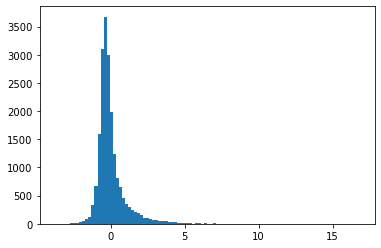

In [81]:
_ = plt.hist(X_stan, bins = 100)

In [74]:
np.exp(-X*(1j)/2).shape

(20000,)

<Figure size 432x288 with 0 Axes>

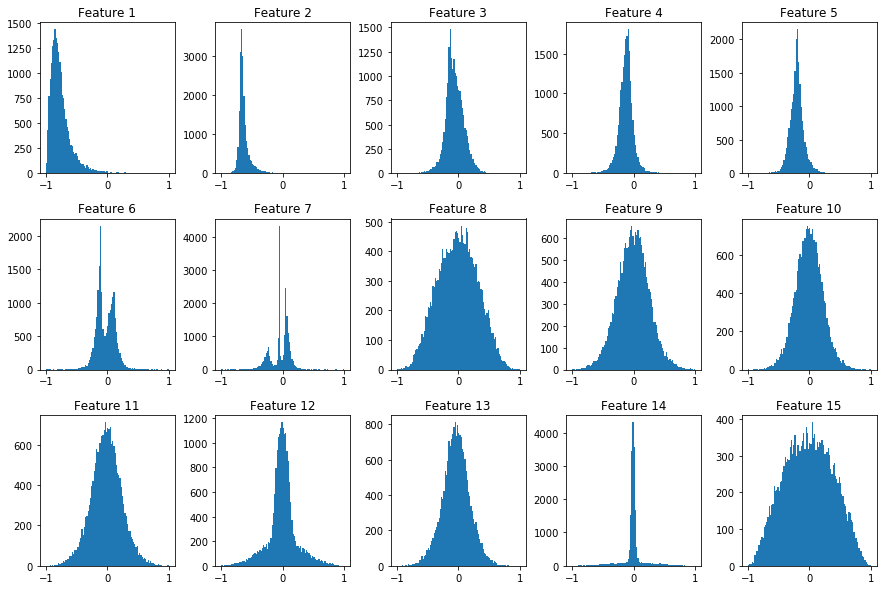

In [139]:
degree = 4
plt.clf()
fig, axis = plt.subplots(3,5, figsize=(15,10))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(3):
    for j in range(5):
        k = i*5+j
        X = x[:, k]
        axis[i][j].hist(X, bins = 100)
        axis[i][j].set_title('Feature {}'.format(k+1))

(array([  1.,   1.,   0.,   2.,   5.,   2.,   0.,   3.,   3.,   4.,   0.,
          2.,   3.,   7.,   3.,   5.,  10.,   7.,   8.,  13.,  17.,  20.,
         32.,  27.,  44.,  40.,  55.,  41.,  75.,  75.,  96., 112., 130.,
        158., 202., 238., 265., 302., 396., 449., 487., 523., 613., 606.,
        730., 759., 773., 838., 822., 739., 816., 844., 788., 746., 729.,
        720., 656., 595., 573., 520., 478., 411., 360., 320., 270., 241.,
        187., 169., 131., 112., 109.,  89.,  64.,  50.,  38.,  34.,  42.,
         30.,  21.,  13.,  18.,  17.,  16.,  12.,   6.,   5.,   6.,   4.,
          3.,   5.,   1.,   1.,   0.,   2.,   1.,   0.,   1.,   2.,   0.,
          1.]),
 array([-0.65058434, -0.63757265, -0.62456097, -0.61154928, -0.59853759,
        -0.58552591, -0.57251422, -0.55950253, -0.54649085, -0.53347916,
        -0.52046747, -0.50745578, -0.4944441 , -0.48143241, -0.46842072,
        -0.45540904, -0.44239735, -0.42938566, -0.41637398, -0.40336229,
        -0.3903506 , -0.37

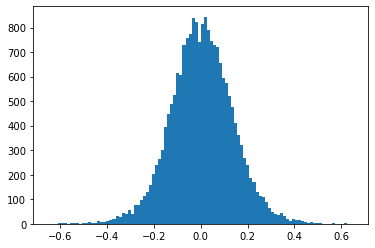

In [126]:
X = x[:, 8]
#_ = plt.hist((np.exp(-X*(1j)/2)).imag, bins=100)
plt.clf()
plt.hist((np.cos(X**degree/2)*np.exp(-X*(1j)/2)-np.sin(X**degree/2)*np.exp(X*(1j)/2)).imag, bins = 100, label='real')

<Figure size 432x288 with 0 Axes>

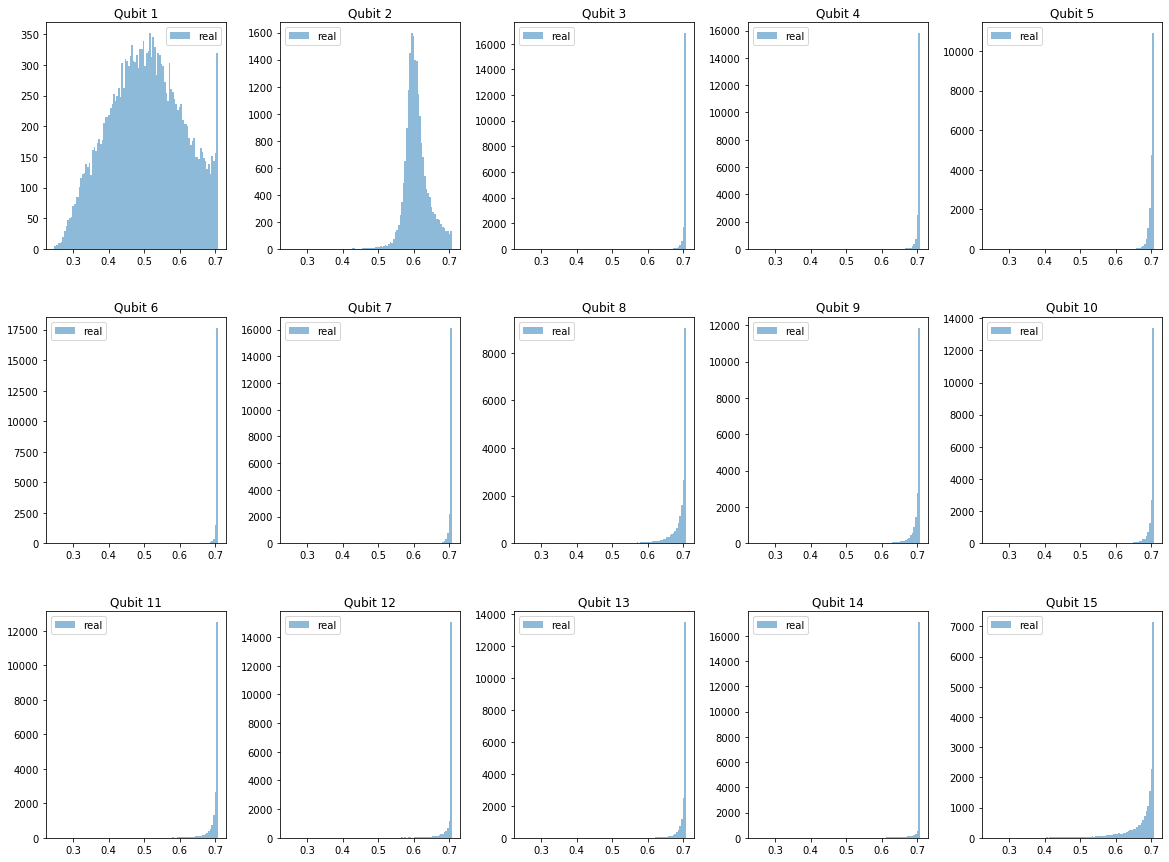

In [165]:
degree = 4
plt.clf()
fig, axis = plt.subplots(3,5, figsize=(20,15))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(3):
    for j in range(5):
        k = i*5+j
        X = x[:, k]
        a1,_,_=axis[i][j].hist((np.cos(X**degree/2)*np.exp(-X*(1j)/2)-np.sin(X**degree/2)*np.exp(X*(1j)/2)).real/2**0.5, bins = 100, label='real', alpha=0.5)
        a2,_,_=axis[i][j].hist((np.cos(X**degree/2)*np.exp(-X*(1j)/2)-np.sin(X**degree/2)*np.exp(X*(1j)/2)).imag/2**0.5, bins = 100, label='imag', alpha=0.5)
        axis[i][j].set_ylim((None, max(max(a1),max(a2))))
        axis[i][j].legend(loc='best')
        axis[i][j].set_title('Qubit {}'.format(k+1))

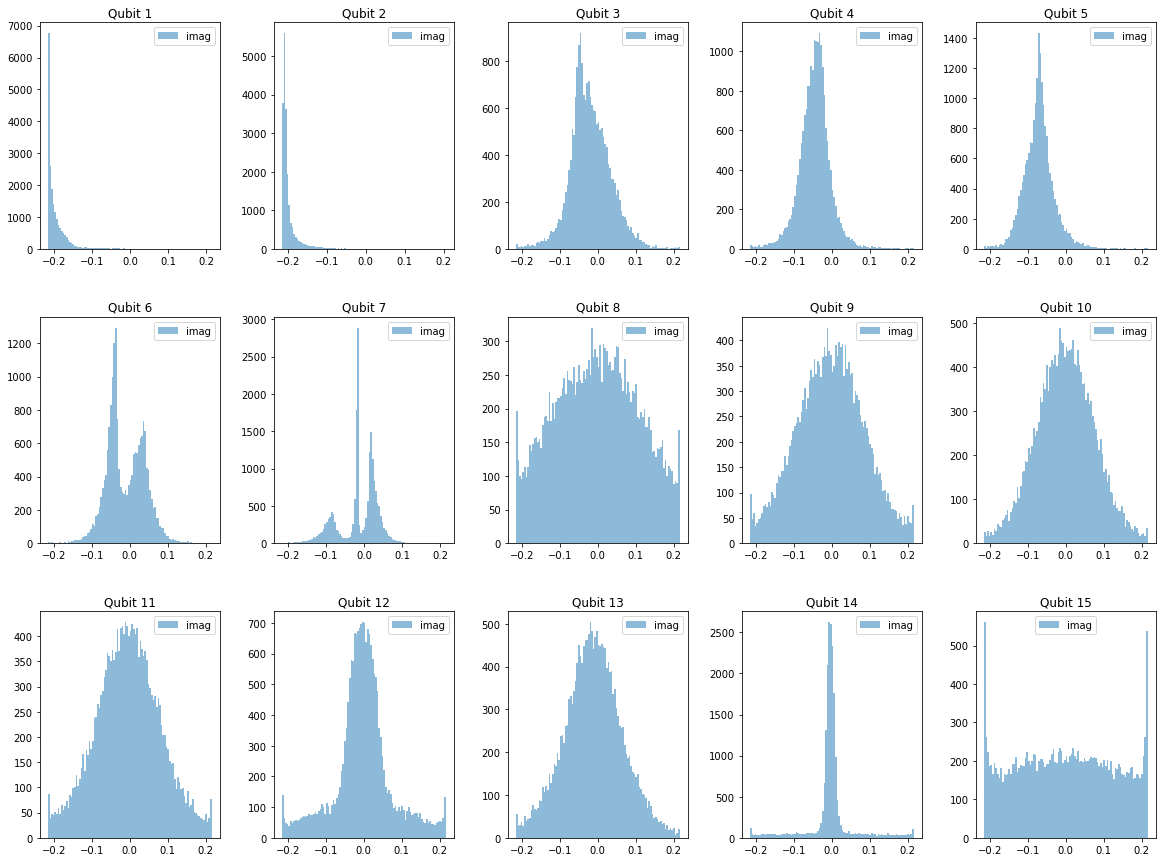

In [163]:
degree = 4
plt.close()
fig, axis = plt.subplots(3,5, figsize=(20,15))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(3):
    for j in range(5):
        k = i*5+j
        X = x[:, k]
        #a1,_,_=axis[i][j].hist((np.sin(X**degree/2)*np.exp(-X*(1j)/2)+np.cos(X**degree/2)*np.exp(X*(1j)/2)).real/2**0.5, bins = 100, label='real', alpha=0.5)
        a2,_,_=axis[i][j].hist((np.sin(X**degree/2)*np.exp(-X*(1j)/2)+np.cos(X**degree/2)*np.exp(X*(1j)/2)).imag/2**0.5, bins = 100, label='imag', alpha=0.5)
        #axis[i][j].set_ylim((None, max(max(a1),max(a2))))
        axis[i][j].legend(loc='best')
        axis[i][j].set_title('Qubit {}'.format(k+1))

<Figure size 432x288 with 0 Axes>

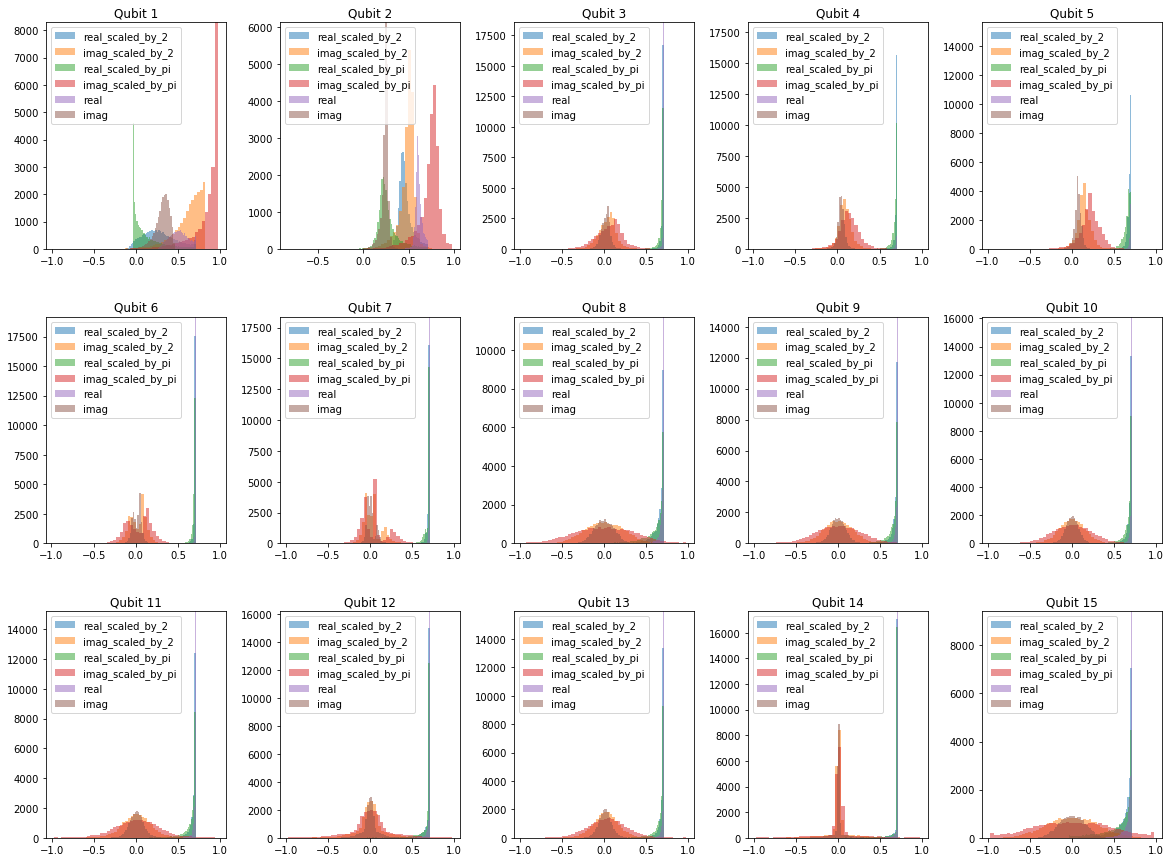

In [173]:
degree = 4
plt.clf()
fig, axis = plt.subplots(3,5, figsize=(20,15))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(3):
    for j in range(5):
        k = i*5+j
        X = x[:, k]
        a1,_,_=axis[i][j].hist((np.cos(X**degree)*np.exp(-X*(1j))-np.sin(X**degree)*np.exp(X*(1j))).real/2**0.5, bins = 50, label='real_scaled_by_2', alpha=0.5)
        a2,_,_=axis[i][j].hist((np.cos(X**degree)*np.exp(-X*(1j))-np.sin(X**degree)*np.exp(X*(1j))).imag/2**0.5, bins = 50, label='imag_scaled_by_2', alpha=0.5)
        a5,_,_=axis[i][j].hist((np.cos(X**degree*np.pi/2)*np.exp(-X*(1j)*np.pi/2)-np.sin(X**degree*np.pi/2)*np.exp(X*(1j)*np.pi/2)).real/2**0.5, bins = 50, label='real_scaled_by_pi', alpha=0.5)
        a6,_,_=axis[i][j].hist((np.cos(X**degree*np.pi/2)*np.exp(-X*(1j)*np.pi/2)-np.sin(X**degree*np.pi/2)*np.exp(X*(1j)*np.pi/2)).imag/2**0.5, bins = 50, label='imag_scaled_by_pi', alpha=0.5)        
        a3,_,_=axis[i][j].hist((np.cos(X**degree/2)*np.exp(-X*(1j)/2)-np.sin(X**degree/2)*np.exp(X*(1j)/2)).real/2**0.5, bins = 50, label='real', alpha=0.5)
        a4,_,_=axis[i][j].hist((np.cos(X**degree/2)*np.exp(-X*(1j)/2)-np.sin(X**degree/2)*np.exp(X*(1j)/2)).imag/2**0.5, bins = 50, label='imag', alpha=0.5)        
        axis[i][j].set_ylim((None, max(max(a1),max(a2), max(a3), max(a4), max(a5), max(a6))))
        axis[i][j].legend(loc='best')
        axis[i][j].set_title('Qubit {}'.format(k+1))

<Figure size 432x288 with 0 Axes>

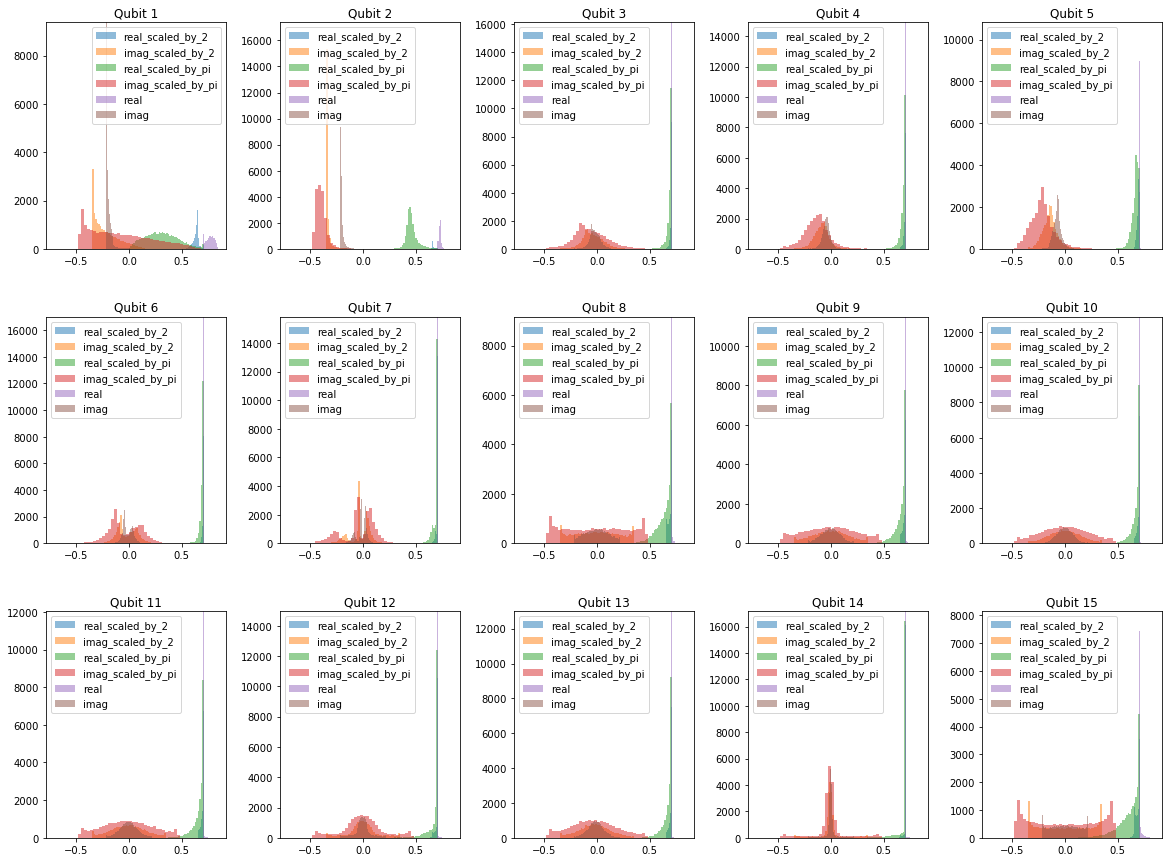

In [174]:
degree = 4
plt.clf()
fig, axis = plt.subplots(3,5, figsize=(20,15))
plt.subplots_adjust(hspace=0.3, wspace=0.3)
for i in range(3):
    for j in range(5):
        k = i*5+j
        X = x[:, k]
        a1,_,_=axis[i][j].hist((np.sin(X**degree)*np.exp(-X*(1j))+np.cos(X**degree)*np.exp(X*(1j))).real/2**0.5, bins = 50, label='real_scaled_by_2', alpha=0.5)
        a2,_,_=axis[i][j].hist((np.sin(X**degree)*np.exp(-X*(1j))+np.cos(X**degree)*np.exp(X*(1j))).imag/2**0.5, bins = 50, label='imag_scaled_by_2', alpha=0.5)
        a5,_,_=axis[i][j].hist((np.sin(X**degree*np.pi/2)*np.exp(-X*(1j)*np.pi/2)+np.cos(X**degree*np.pi/2)*np.exp(X*(1j)*np.pi/2)).real/2**0.5, bins = 50, label='real_scaled_by_pi', alpha=0.5)
        a6,_,_=axis[i][j].hist((np.sin(X**degree*np.pi/2)*np.exp(-X*(1j)*np.pi/2)+np.cos(X**degree*np.pi/2)*np.exp(X*(1j)*np.pi/2)).imag/2**0.5, bins = 50, label='imag_scaled_by_pi', alpha=0.5)        
        a3,_,_=axis[i][j].hist((np.sin(X**degree/2)*np.exp(-X*(1j)/2)+np.cos(X**degree/2)*np.exp(X*(1j)/2)).real/2**0.5, bins = 50, label='real', alpha=0.5)
        a4,_,_=axis[i][j].hist((np.sin(X**degree/2)*np.exp(-X*(1j)/2)+np.cos(X**degree/2)*np.exp(X*(1j)/2)).imag/2**0.5, bins = 50, label='imag', alpha=0.5)        
        axis[i][j].set_ylim((None, max(max(a1),max(a2), max(a3), max(a4), max(a5), max(a6))))
        axis[i][j].legend(loc='best')
        axis[i][j].set_title('Qubit {}'.format(k+1))

In [161]:
for feature_index in range(15):
    X = x[:, feature_index]
    r0 = (np.cos(X**degree/2)*np.exp(-X*(1j)/2)-np.sin(X**degree/2)*np.exp(X*(1j)/2)).real
    i0 = (np.cos(X**degree/2)*np.exp(-X*(1j)/2)-np.sin(X**degree/2)*np.exp(X*(1j)/2)).imag
    r1 = (np.sin(X**degree/2)*np.exp(-X*(1j)/2)+np.cos(X**degree/2)*np.exp(X*(1j)/2)).real
    i1 = (np.sin(X**degree/2)*np.exp(-X*(1j)/2)+np.cos(X**degree/2)*np.exp(X*(1j)/2)).imag
    print(r1**2+i1**2+r0**2)

[1.95356886 1.93950434 1.77786295 ... 1.67977923 1.88964502 1.83192974]
[1.90878511 1.84357291 1.87331676 ... 1.87539259 1.83655295 1.84559099]
[1.99892633 1.99630584 1.9814528  ... 1.99996584 1.99641367 1.99811541]
[1.96692676 1.99842008 1.9910324  ... 1.99584254 1.99797261 1.98787579]
[1.99981187 1.99736184 1.99337432 ... 1.98506879 1.99916677 1.98293709]
[1.9953775  1.9961865  1.99516435 ... 1.99997299 1.9647863  1.99460962]
[1.98981684 1.96119313 1.99935085 ... 1.98387428 1.98716064 1.99787581]
[1.92999626 1.99382314 1.97861147 ... 1.99573651 1.93471165 1.98872117]
[1.99757367 1.99996327 1.92808209 ... 1.97361431 1.99990556 1.93725362]
[1.99623628 1.99999923 1.98093456 ... 1.99947198 1.99085857 1.99884932]
[1.99963523 1.99997475 1.9990866  ... 1.99546972 1.97544863 1.99841976]
[1.99648996 1.99870128 1.99912469 ... 1.99771159 1.99583773 1.99670716]
[1.97759383 1.99908507 1.98893331 ... 1.99999969 1.9983826  1.99381213]
[1.99834388 1.99997545 1.99995767 ... 1.99990712 1.99984929 1.92

In [152]:
v

array([1., 1., 1., ..., 1., 1., 1.])

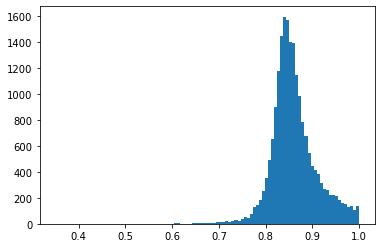

In [95]:
degree = 4
_ = plt.hist((np.cos(X**degree/2)*np.exp(-X*(1j)/2)-np.sin(X**degree/2)*np.exp(X*(1j)/2)).real, bins = 100)

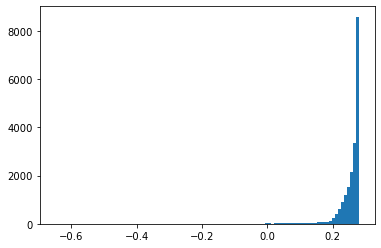

In [54]:
_ = plt.hist((np.cos(X**degree/2)*np.exp(-X*(1j)/2)-np.sin(X**degree/2)*np.exp(X*(1j)/2)).imag, bins = 100)

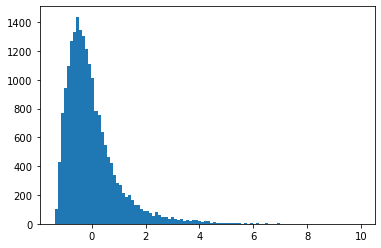

In [37]:
_ = plt.hist((X-X.mean())/X.std(), bins = 100)

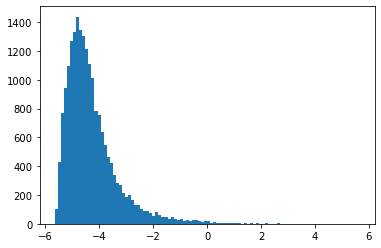

In [38]:
_ = plt.hist((X)/X.std(), bins = 100)

In [64]:
from quple import QuantumCircuit
import sympy as sp
cq = QuantumCircuit(1)
cq.RY(sp.Symbol('x'), 0)
final_state = cq.get_state_vectors(np.array([[1],[1]]))

In [66]:
print(cq)

(0, 0): ───Ry(x)───


In [67]:
print(np.cos(1/2), np.sin(1/2))

0.8775825618903728 0.479425538604203


In [65]:
final_state

array([[0.8775825+0.j, 0.4794257+0.j],
       [0.8775825+0.j, 0.4794257+0.j]], dtype=complex64)

In [79]:
np.array([0.8775825+0.j, 0.4794257+0.j]) @ np.array([0.8775825+0.j, 0.4794257+0.j])

(1.00000004612674+0j)

In [4]:
symbol_names = list(resolver[0].param_dict.keys())

NameError: name 'resolver' is not defined

In [53]:
import tensorflow_quantum as tfq
state_layer = tfq.layers.State(backend=None)
states = state_layer(cq, symbol_names=symbol_names, symbol_values=resolver)

TypeError: symbol_values cannot be parsed to float32 tensor given input: 

In [64]:
import numpy as np
import sympy
import cirq
from cirq import Circuit, GridQubit
import tensorflow_quantum as tfq

n_qubit = 20
n_circuits = 2047


cq = Circuit()
thetas = sympy.symarray('θ', n_qubit)
qubits = GridQubit.rect(1, n_qubit)
cq.append([cirq.rz(theta)(qubit) for theta, qubit in zip(thetas, qubits)])

x = np.random.rand(3000, 20)
state_layer = tfq.layers.State()
symbol_names = [theta.name for theta in thetas]
states = state_layer(cq, symbol_names=symbol_names, symbol_values=x)

ResourceExhaustedError: OOM when allocating tensor with shape[3000,1048576] and type complex64 on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu [Op:TfqSimulateState]

In [1]:
import sympy as sp

In [5]:
type(sp.pi)

sympy.core.numbers.Pi

In [1]:
import tensorflow as tf
import tensorflow_quantum as tfq
import numpy as np
import glob
import os
import quple
from quple.classifiers import QSVM, QSVMLogger
from quple.data_encoding import  EncodingCircuit
from quple import PauliBlock
from quple.data_encoding.encoding_maps import trial_2
from quple.utils.sysinfo import get_cpu_count

In [2]:
def compute_kernel_from_states(data_batch, stride=1000):
    batch_dim = tf.gather(tf.shape(data_batch), 0)
    empty_symbols = tf.convert_to_tensor([], dtype=tf.dtypes.string)
    empty_values = tf.tile(tf.convert_to_tensor([[]]), [stride, 1])
    ref_others = tf.reshape(tf.tile(data_batch, [stride]), [stride, batch_dim])
    res = np.empty((batch_dim, batch_dim))
    for i in range(0, batch_dim, stride):
        print('Processing state overlaps: ', i, '/', batch_dim.numpy())
        interim = tfq.math.inner_product(data_batch[i:i+stride], empty_symbols, empty_values, ref_others)
        res[i:i+stride] = (tf.math.abs(interim) ** 2).numpy()
    return res

In [3]:
files = glob.glob('/eos/atlas/unpledged/group-wisc/users/shsun/for_akaid/qsvm_inputs_q20_20k/*.npz')

In [4]:
data = dict(np.load(files[0],allow_pickle=True))
x_train, x_val, x_test = data['x_train'], data['x_val'], data['x_test']
y_train, y_val, y_test = data['y_train'], data['y_val'], data['y_test']

In [5]:
quple.MAX_WORKERS = get_cpu_count()
def get_encoding_circuit(n_qubit, depth, degree):
    if degree > 0:
        encoding_circuit = EncodingCircuit(feature_dimension=n_qubit, 
                                            copies=depth,
                                            rotation_blocks=['H',PauliBlock('Z', trial_2(1)),
                                                               PauliBlock('Y',trial_2(degree))],
                                            entanglement_blocks=[PauliBlock('ZZ',trial_2(degree))],
                                            entangle_strategy='alternate_linear')
    else:
        encoding_circuit = EncodingCircuit(feature_dimension=n_qubit, 
                                            copies=depth,
                                            rotation_blocks=['H',PauliBlock('Z', trial_2(1))],
                                            entanglement_blocks=[PauliBlock('ZZ',trial_2(0))],
                                            entangle_strategy='alternate_linear') 
    return encoding_circuit 

In [6]:
cq = get_encoding_circuit(20, 2, 2)

In [7]:
import time
start = time.time()
resolved_circuits = cq.resolve_parameters(x_train[:100])
end = time.time()
print(end-start)

1.532259225845337


In [8]:
import time
start = time.time()
resolved_circuits = cq.resolve_parameters_with_tfq(x_train[:100])
end = time.time()
print(end-start)

5.003594398498535


In [9]:
resolved_circuits[0]

(0, 0): ────H───Rz(-0.234π)───Ry(0.172π)───@────────────────@───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────H───Rz(-0.234π)───Ry(0.172π)────@─────────────────────────@───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                                           │                │                                                                                                                                                                                                                                                                   │                         │
(0, 1): ────H───Rz(-0.212π)───Ry(0.142π)───X───Rz(0.199π)───X─────────────────────────@─────────────────────────────────────────────────────────────────────────────────────────────────@───────────────────────────────────────────────────────────────────────────────────────────────────────H───Rz(-0.212π)───Ry(0.142π)────X────────────Rz(0.199π)───X─────────────────────────@─────────────────────────────────────────────────────────────────────────────────────────────────@───────────────────────────────────────────────────────────────────────────────────────────────────────────
                                                                                      │                                                                                                 │                                                                                                                                                                                           │                                                                                                 │
(0, 2): ────H───Rz(-0.094π)───Ry(0.028π)───@─────────────────────────────@────────────X────────────────────────────────────────────────────────────────────────────────────Rz(0.094π)───X───────────────────────────────────────────────────────────────────────────────────────────────────────H───Rz(-0.094π)───Ry(0.028π)────@──────────────────────────────────────@────────────X────────────────────────────────────────────────────────────────────────────────────Rz(0.094π)───X───────────────────────────────────────────────────────────────────────────────────────────────────────────
                                           │                             │                                                                                                                                                                                                                                                      │                                      │
(0, 3): ────H───Rz(-0.089π)───Ry(0.025π)───X────────────────Rz(0.033π)───X────────────────────@──────────────────────────────────────────────────────────────────────────────────────────────────────@──────────────────────────────────────────────────────────────────────────────────────────H───Rz(-0.089π)───Ry(0.025π)────X─────────────────────────Rz(0.033π)───X────────────────────@──────────────────────────────────────────────────────────────────────────────────────────────────────@──────────────────────────────────────────────────────────────────────────────────────────────
                                                                                              │                                                                                                      │                                                                                                                                                                                      │                                                                                                      │
(0, 4): ────H───Rz

In [12]:
train_cq = cq.resolve_parameters(x_train)

In [8]:
test_cq = cq.resolve_parameters(x_val)

In [ ]:
km_test = compute_kernel_from_states(tfq.convert_to_tensor(train_cq), 50)

Processing state overlaps:  0 / 20000


In [11]:
sv = cq.get_state_vectors(x_train)

In [12]:
km = QSVM.get_kernel_matrix(sv, sv)

In [15]:
km.dtype

dtype('float64')

In [1]:
import numpy as np

In [10]:
results = {
    'qsvm': np.array([0.922461275, 0.92333801, 0.91988033, 0.927383595, 0.923012335, 0.92062854, 0.927130265, 0.92099453, 0.92197447]),
    'bdt': np.array([0.923454955,0.923707945,0.921401945,0.92841118,0.923207315,0.92059199,0.92527666,0.921389855,0.92175359,0.922242625,0.922175395,0.92178587,0.923032395,0.92391366,0.918940385,0.918958025,0.92533246,0.921119375,0.923239515,0.921636175,0.9198949,0.922698265,0.92125866,0.92686224,0.924698295,0.92411976,0.920300805,0.922056975,0.925716345,0.926870935]),
    'svm': np.array([0.91977742,0.919741955,0.91621401,0.92203226,0.9203329,0.916664545,0.92447415,0.91639005,0.919807785,0.91759945,0.9188447,0.918800485,0.91853832,0.92081842,0.916095535,0.917496995,0.92138657,0.915784025,0.91835458,0.91882923,0.91473011,0.919055865,0.917476215,0.922858345,0.91995467,0.92069564,0.91729699,0.91709962,0.92131231,0.923075795])
}

In [11]:
l = len(results['qsvm'])
for k in results:
    print('{}: {:.10f} ± {:.10f} ({})'.format(k, np.mean(results[k][:l]), np.std(results[k][:l], ddof=1), l))

    mu = np.mean(results['qsvm'][:l]-results['bdt'][:l])
sigma = np.std(results['qsvm'][:l]-results['bdt'][:l], ddof=1)
print('ΔBDT: {:.10f} (𝜇/σ={:.4f})'.format(mu, mu/sigma))
mu = np.mean(results['qsvm'][:l]-results['svm'][:l])
sigma = np.std(results['qsvm'][:l]-results['svm'][:l], ddof=1)
print('ΔSVM: {:.10f} (𝜇/σ={:.4f})'.format(mu, mu/sigma))

qsvm: 0.9229781500 ± 0.0026717295 (9)
bdt: 0.9232439372 ± 0.0024284266 (9)
svm: 0.9194927861 ± 0.0027519839 (9)
ΔBDT: -0.0002657872 (𝜇/σ=-0.2738)
ΔSVM: 0.0034853639 (𝜇/σ=3.3371)


In [1]:
from quple import QuantumCircuit

In [2]:
cq = QuantumCircuit(2)

In [3]:
import sympy as sp
x = sp.symarray('x', 2)

In [4]:
cq.PauliRotation('ZZ', x[0]+x[1], (0,1))

In [5]:
print(cq)

(0, 0): ───@───────────────────@───
           │                   │
(0, 1): ───X───Rz(x_0 + x_1)───X───


In [4]:
cq = QuantumCircuit(3)
cq.PauliRotation('XXY', x[0]+x[1], (0,1,2))
cq

(0, 0): ───Rx(0.5π)───@───────────────────────────@───Rx(-0.5π)───
                      │                           │
(0, 1): ───H──────────X───@───────────────────@───X───H───────────
                          │                   │
(0, 2): ───H──────────────X───Rz(x_0 + x_1)───X───────H───────────

In [5]:
from quple.data_encoding import EncodingCircuit
from quple.circuits.templates.pauli_block import PauliBlock
from quple.data_encoding.encoding_maps import polynomial
from cirq.circuits import InsertStrategy
degree = 2
cq = EncodingCircuit(15, rotation_blocks=['H',PauliBlock('Z', polynomial(1)),
                                        PauliBlock('Y', polynomial(degree))],
                    entanglement_blocks = [PauliBlock('ZZZ', polynomial(degree))], entangle_strategy=[(0,1,2), (4,5,6), (8,9,10), (12,13,14), (2,3,4), (6,7,8), (10,11,12)],
                    )

In [6]:
print(cq)

(0, 0): ────H───@─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────@────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
                │                                                                                                                                     │
(0, 1): ────H───X────────────────────────────────────────────────────────────────────────────────────@────────────────────────────────────────────@───X─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────